# 1. Import data and  libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [11]:
#Creating path
path = r'C:\Users\kater\Desktop\DATA IMMERSION\ACHIEVEMENT 4\Instacart Basket Analysis'

In [3]:
#Import the newest merged orders_product data with derived columns
ords_prods_merge = pd.read_pickle(r'C:\Users\kater\Downloads\4.3_orders_products\Prepared Data\ords_prods_merge_flagged.pkl')

<Axes: xlabel='order_day_of_week'>

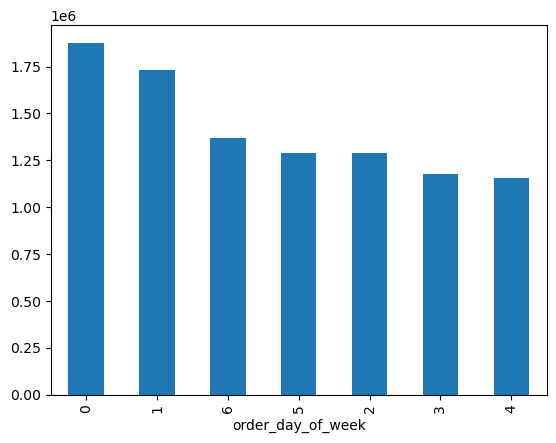

In [4]:
#Create bar chart
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

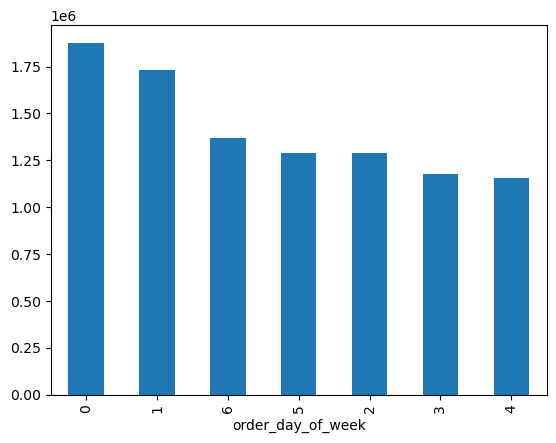

In [9]:
bar = ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

In [13]:
#Export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

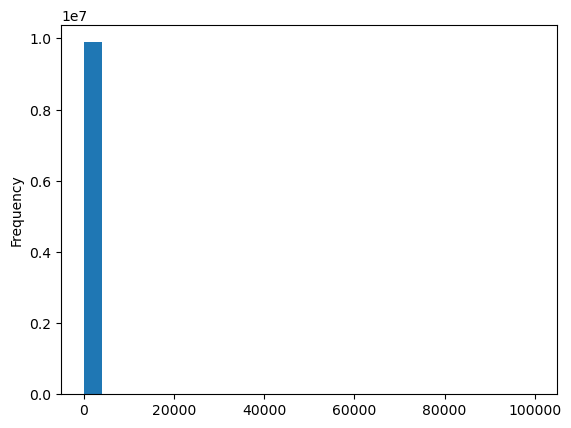

In [14]:
#Create histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

In [15]:
ords_prods_merge['prices'].describe()

count    9.891879e+06
mean     1.106301e+01
std      4.081609e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='prices', ylabel='prices'>

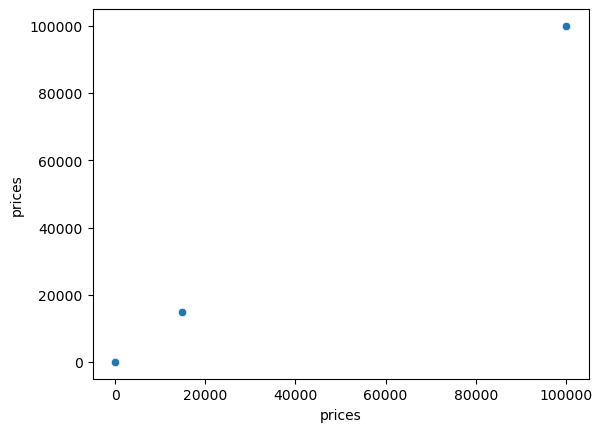

In [17]:
#Create scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [18]:
#Check for outliers in 'prices' column
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

product_id                      product_name  aisle_id  \
4000766       21553  Lowfat 2% Milkfat Cottage Cheese       108   
4000767       21553  Lowfat 2% Milkfat Cottage Cheese       108   
4000768       21553  Lowfat 2% Milkfat Cottage Cheese       108   
4000769       21553  Lowfat 2% Milkfat Cottage Cheese       108   
4000770       21553  Lowfat 2% Milkfat Cottage Cheese       108   
...             ...                               ...       ...   
6653436       33664             2 % Reduced Fat  Milk        84   
6653437       33664             2 % Reduced Fat  Milk        84   
6653438       33664             2 % Reduced Fat  Milk        84   
6653439       33664             2 % Reduced Fat  Milk        84   
6653440       33664             2 % Reduced Fat  Milk        84   

         department_id   prices  order_id  user_id  order_number  \
4000766             16  14900.0    912404       17            12   
4000767             16  14900.0    603376       17            22   
4000768             16  14900.0   3264360      135             2   
4000769             16  14900.0    892534      135             3   
4000770             16  14900.0    229704      342             8   
...                ...      ...       ...      ...           ...   
6653436             16  99999.0   1590638    63612            12   
6653437             16  99999.0   2218438    64201             5   
6653438             16  99999.0   1254887    64773            13   
6653439             16  99999.0    612644    64773            14   
6653440             16  99999.0   2527503    66522             8   

         order_day_of_week  order_hour_of_day  ...         price_range  \
4000766                  2                 14  ...  High-range product   
4000767                  6                 16  ...  High-range product   
4000768                  2                 21  ...  High-range product   
4000769                  0                  8  ...  High-range product   
4000770                  1                 19  ...  High-range product   
...                    ...                ...  ...                 ...   
6653436                  1                 15  ...  High-range product   
6653437                  2                 19  ...  High-range product   
6653438                  6                 12  ...  High-range product   
6653439                  3                 15  ...  High-range product   
6653440                  0                 14  ...  High-range product   

            busiest_day         busiest_days busiest_period_of_day max_order  \
4000766  Regularly busy  Regularly busy days           Most orders        40   
4000767  Regularly busy  Regularly busy days           Most orders        40   
4000768  Regularly busy  Regularly busy days        Average orders         4   
4000769     Busiest day         Busiest days        Average orders         4   
4000770  Regularly busy         Busiest days        Average orders        16   
...                 ...                  ...                   ...       ...   
6653436  Regularly busy         Busiest days           Most orders        12   
6653437  Regularly busy  Regularly busy days        Average orders        13   
6653438  Regularly busy  Regularly busy days           Most orders        15   
6653439  Regularly busy      Least busy days           Most orders        15   
6653440     Busiest day         Busiest days           Most orders         8   

             loyalty_flag mean_price spending_flag  \
4000766  Regular customer    14900.0  High spender   
4000767  Regular customer    14900.0  High spender   
4000768      New customer    14900.0  High spender   
4000769      New customer    14900.0  High spender   
4000770  Regular customer    14900.0  High spender   
...                   ...        ...           ...   
6653436  Regular customer    99999.0  High spender   
6653437  Regular customer    99999.0  High spender   
6653438  Regular customer    99999.0  High spender 

In [19]:
#Mark outliers as missing values
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [20]:
#Check the replacement that was made on outliers
ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

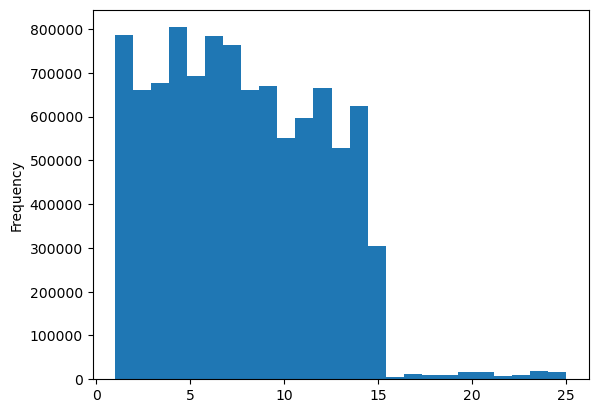

In [21]:
#Create histogram with new values
ords_prods_merge['prices'].plot.hist(bins = 25)

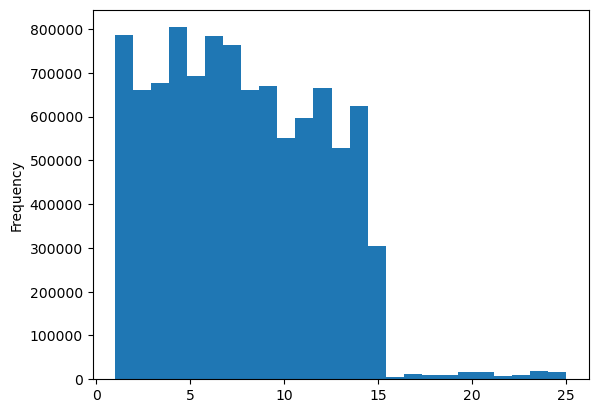

In [23]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

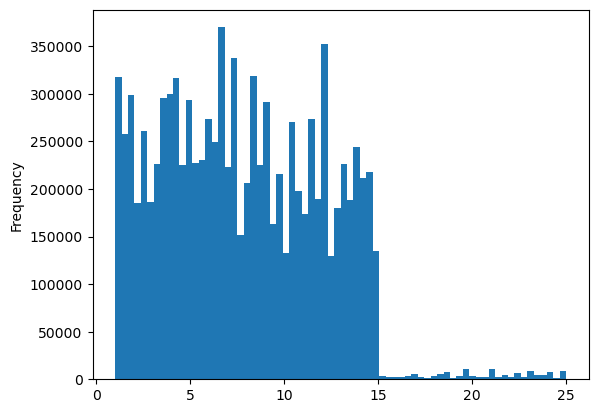

In [24]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [25]:
#Export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_prices_dow.png'))

# Sampling Data and Line Chart

In [33]:
#Create a list holding True/False values to the test np.random.rand() <=0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [34]:
#Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [38]:
#Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [39]:
len(ords_prods_merge)

9891879

In [40]:
len(big) + len(small)

9891879

In [42]:
#Reducing your samples to only those columns necessary for the chart,  “prices” and “order_day_of_week.”
df_2 = small[['order_day_of_week','prices']]

C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

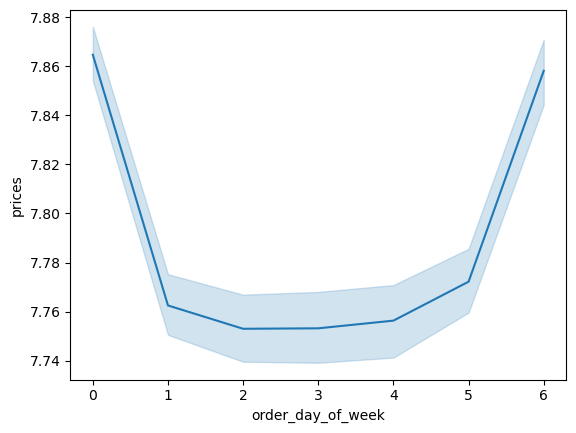

In [43]:
#Create line chart of the small subset
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

In [44]:
#Export line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'linechart_prices_dow.png'))